# Elliptic Curve Cryptography

All cryptography textbooks are stuck in the 1980s or at best 1990s. It will take a bit of math, but I'll bring you into modern times.

### SageMath

It's a special language for math based on Python 2. Python 3 got released in 2008, but not everyone got the memo yet.

### Some use cases

* If Alice👩‍💻 and Bob👨🏻‍💻 already have a shared key, everything is simple. Public key cryptography helps them generate such key over public channel. (Diffie-Hellman) 
* Proving you are who you claim to be. (SSL certificates)
* Proving it's your bitcoins you're spending. (Blockchain)
* Sending leaked information to Wikileaks or other journalists (GPG)

### Number-like objects

* Additive Group - something you can "add" and "subtract"
* Multiplicative Group - something you can "multiply" and "divide"
* Field - something you can "add", "subtract", "multiply", and "divide" (except by zero)

Additive vs Multiplicative Group is just a matter of notation.

### Examples

* Complex numbers are a Field
* Real numbers are a Field
* Rational numbers are a Field
* Integers are an additive Group, but not Field (since you cannot divide)
* Clock Rotations are a Group
* Rubik Cube transformations are a Group.
* Finite Fields - Prime Fields $GF(p)$ and Extension Fields $GF(p^k)$

### Prime Fields $GF(p)$

Finite Field with $p$ elements, where $p$ is a big publicly known prime. Most public key cryptography is based on that.

In [1]:
print is_prime(101)
K = GF(101)

True


In [2]:
print K(2) + K(10)
print K(80) + K(30)

print 110 % 101

12
9
9


In [3]:
print K(30) - K(10)
print K(30) - K(50)

print -20 % 101

20
81
81


In [4]:
print K(5) * K(10)
print K(30) * K(40)

print 1200 % 101

50
89
89


### $GF(p)$ inverse

If $p$ is prime, then every element except zero has inverse $y$ (so $x*y$ equals $1$).

Dividing by $x$ is the same as multiplying by $y$.

Inversion and therefore division is very slow compared with other operations.

In [5]:
x = K(33)
y = x^(101-2)
print y
print x * y
print K(14) / x == K(14) * y

49
1
True


### Exponentiation by squaring

$p-2$ is huge, but we don't need to multiply it $p-2$ times, we just square a bunch of times and multiply relevant squares.

For 128 bit prime $p$, we need between 128 and 256 multiplications. We usually pick prime close to $2^k$ to make this and other steps faster.

In [6]:
x2 = x*x
x4 = x2*x2
x8 = x4*x4
x16 = x8*x8
x32 = x16*x16
x64 = x32*x32
x99 = x64*x32*x2*x
print(x99)

49


### Extension Fields $GF(p^k)$

There are only two kinds of Finite Fields:

* *Prime Fields* $GF(p)$ - size is prime
* *Extension Fields* $GF(p^k)$ - size is power of a prime

There are no Finite Fields with other sizes, and all fields of same size are identical up to trivial rearrangement.

Prime Fields are super easy (everything except inversion is obvious) and widely used.

Extension Fields are much more complicated, and rarely used, so we won't be covering them today. They're actually needed for some things like pairing based crypto, and CPUs got new instructions to make them faster, so we'll probably see a lot of them next decade. Extension fields used in cryptography are usually $GF(2^p)$, $GP(p^2)$, $GP(p^3)$, $GP(p^6)$, $GP(p^{12})$.

### Diffie Hellman
* Alice👩‍💻 and Bob👨🏻‍💻 somehow agree to $GF(p)$ and its element $g$. They don't need to be secret. Whole internet can make same choices.
* Alice👩‍💻 chooses secret random number $a$, and sends $A=g^a$.
* Bob👨🏻‍💻 chooses secret random number $b$, and sends $B=g^b$.
* Because $GF(p)$ is a field, $B^a = (g^b)^a = g^{b*a} = g^{a*b} = (g^a)^b = A^b$.
* Knowing $GF(p)$, $g$, $A$, $B$ won't let eavesdropper Eve figure out the key.
* With this key, Alice👩‍💻 and Bob👨🏻‍💻 can communicate safely.
* This is not enough if Eve🕵🏽‍♀️ can modify network traffic.

![mandatory xkcd](https://imgs.xkcd.com/comics/alice_and_bob.png)

In [7]:
p = 101
K = GF(p)
g = K(2)
a = randint(2, p)
b = randint(2, p)
ga = g^a
gb = g^b
print "Alice sends %s and Bob sends %s" % (ga, gb)
gab = ga^b
gba = gb^a
print "Alice knows key is %s. Bob knows key is %s. Eve knows nothing." % (gba, gab)

Alice sends 98 and Bob sends 70
Alice knows key is 82. Bob knows key is 82. Eve knows nothing.


### Problems with Diffie Hellman
* Discrete Logarithm Problem: Knowing $g^a$ and $g$, find $a$.
* If multiplicative group of $GF(p)$ had no special structure, it would take $2^k$ steps to break it for $2k$-bit key.
* Multiplicative group of $GF(p)$ has a lot of structure, best algorithms for discrete logarithm are quite good, so huge keys are needed to compensate for that.

NIST recommended key sizes (AES vs DH):
* 80 bit - 1024 bit
* 112 bit - 2048 bit
* 128 bit - 3072 bit
* 192 bit - 7680 bit
* 256 bit - 15348 bit

It's a lot of much data to send with every request, quite slow, and algorithms keep improving.

### Elliptic Curves

Diffie Hellman algorithm works for any group. We want group which has:
* minimum exploitable structure
* efficient computations
* small size

Turns out elliptic curves are the only such group we have. (_maybe hyperelliptic curves or lattices_)

Elliptic Curve over field $K$ is set of points which fulfill:

$y^2 + a_1 xy + a_3 y = x^3 + a_2 x^2 + a_4 x + a_6$

Plus special "point at infinity". With really weird "addition" operation.

For fields other than $GF(2^k)$ and $GF(3^k)$, we can drop most of those terms and have just:

$y^2 = x^3 + a_4 x + a_6$

Curve is invalid if intersects itself or forms cusps (easy formula to verify this).

Elliptic Curve defined by y^2 = x^3 - x over Rational Field


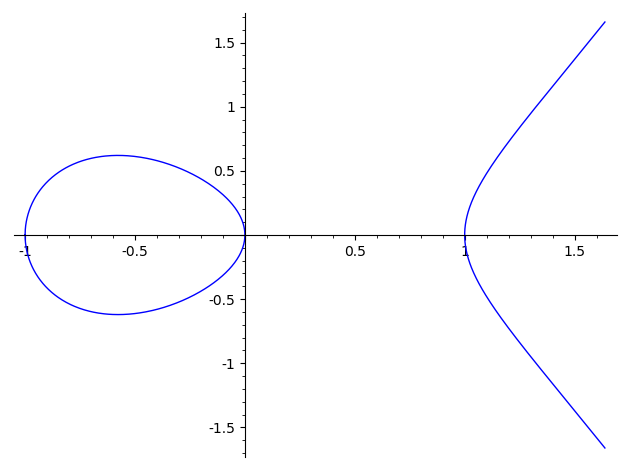

In [8]:
E1 = EllipticCurve(QQ, [-1,0])
print(E1)
plot(E1)

Elliptic Curve defined by y^2 = x^3 - 3*x + 3 over Rational Field


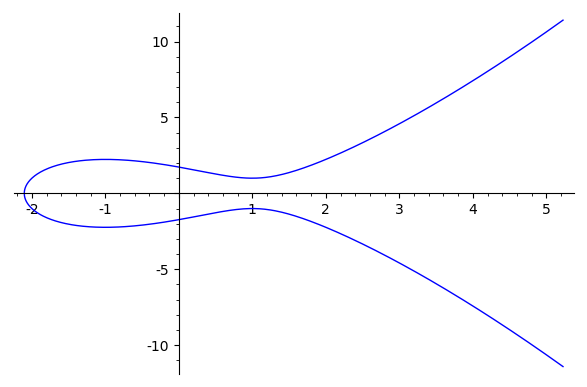

In [9]:
E2 = EllipticCurve(QQ, [-3,3])
print(E2)
plot(E2)

Elliptic Curve defined by y^2 = x^3 + 2*x + 3 over Finite Field of size 101


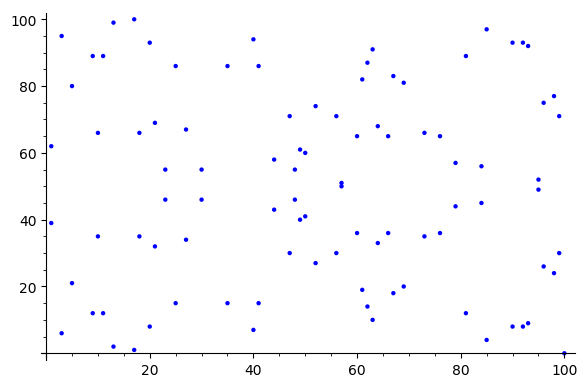

In [10]:
p = 101
K = GF(p)
E = EllipticCurve(K,[2, 3])
print(E)
plot(E)

### Elliptic Group Addition
* "point at infinity" acts like zero
* Every straight line crosses the curve at 3 points (possibly with multiplies, or point at infinity). Sum of those three points is zero.
* To negate a point, flip it vertically. $R=(x,y)$, $-R=(x,-y)$
* To add $P+Q$ draw a line through $P$ and $Q$, it will generally hit the curve at another point $R$, result is $-R$
* except when $P=P$, then extend a line tangent to the curve at that point, it will hit $R$, and result is $-R$
* except when $P+(-P)$, then it won't cross curve anywhere else, and result is "point at infinity"
* except when $P$ or $Q$ is "point at infinity", then result is the other point
* WTF?

![Addition](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/ECClines.svg/2560px-ECClines.svg.png)

### Anyway, we can run Elliptic Curve Diffie Hellman with this

In [11]:
p = 101
K = GF(p)
E = EllipticCurve(K,[2,3])
g = E.random_point()
a = randint(2, p)
b = randint(2, p)
print(g)
ga = g*a
gb = g*b
print "Alice sends %s and Bob sends %s" % (ga, gb)
gab = ga*b
gba = gb*a
print "Alice knows key is %s. Bob knows key is %s. Eve knows nothing." % (gba, gab)

(11 : 89 : 1)
Alice sends (69 : 20 : 1) and Bob sends (27 : 67 : 1)
Alice knows key is (69 : 20 : 1). Bob knows key is (69 : 20 : 1). Eve knows nothing.


### Point Representations
* Short Weierstrass curves were first popular curves, but bad for computation.
* Huge diversity of curves, mathematically they're _pretty much_ equivalent.
* Mathematical security is the same. If you want to hack a curve, you can easily translate it to most convenient form first.
* Explicit-Formulas Database [ https://hyperelliptic.org/EFD/ ] for how to add points on various curves.
* Affine form is $(x,y)$, but it's completely impractical, as division is 100x slower than multiplication, and we'd do it a lot.
* Instead we use projective form like $(X,Y,Z)$. $(x,y) = (X/Z,Y/Z)$ or something similar. This means we only do one division at the very end. To divide $X$ you multiply $Y$ and $Z$ etc.

### Security and Performance Considerations
* We want to choose a safe curve - most random curves are safe, but it's possible to pick a bad curve on purpose (NSA tried literally that with Dual_EC_DRBG) [ https://safecurves.cr.yp.to/ ]
* We want it fast (so we use $(X,Y,Z)$ or such for calculations)
* We want it small (so we only send $x$ and $+$ or $-$ bit)
* We want fewest special cases (Short Weierstrass has too many)
* We want all calculations to take same time for all data, to avoid timing side channel attack
* We want prime about 256 bits for AES-128 equivalent.
* We want prime differing from $2^k$ in fewest positions. $p = 2^{255} − 19$ is very popular (for Curve25519 and Ed25519)
* Squeezing last bits of elliptic curve performance with fancy math and fancy hardware optimization is popular pasttime of cryptographers.

### There Is More
* We can run key agreement (ECDH), signatures (EdDSA), public encryption just like with traditional public key cryptography.
* Original motivation was just small key size, better safety, and better performance.
* It turns out elliptic curves can do a lot more, mostly thanks to pairing.
* Pairing function $f(a,x)$ is bilinear, that is $f(a+b,x) = f(a,x)*f(b,x)$ and $f(a,x+y) = f(a,x)*f(a,y)$
* It takes months of math to understand why it works, but it just does.
* Pairing is $E(GF(p))$, $E(GF(p))$ to $GF(p^k)$
* Or $E(GF(p))$, $E(GF(p^k))$ to $GF(p^k)$
* Or something like that. Special kinds of elliptic curves are needed to keep this $k$ in check. For random curve $k$ would be ridiculously big.

### What Pairing Gives Us
* Compressed Signatures - 1000 signatures from 1000 people can be compressed to just one element, that makes blockchain so much smaller.
* Identity Based Encryption - Encrypt something for Alice without knowing her key, just her ID like email (and master public key). Alice still needs trusted server (with master private key) to generate private key for her. 
* Attribute Based Encryption - Encrypt something so that only people with some combination of attributes can access it. So only your doctor, or your family member can decrypt your health data. (still needs trusted server to generate those attribute keys). The key is basically locked behind a small program that checks a bunch of attributes.
* Prove that you did some calculations without revealing anything about it. Spend cryptocurrency on the blockchain without revealing how much you spent, how much you have, who are you, and who is the recipient. With Bitcoin all of that is public (just pseudonymous)!
* It's area of very active research. We can do things completely impossible with old crypto. Revolution in cryptography is coming.

### Quantum Computers
* If Quantum Computers actually happen, we're all fucked. Traditional and Elliptic Curve crypto equally.

### Questions?